In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("csv-files/startup_funding.csv")
df.shape

(3044, 10)

In [4]:
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [5]:
df.shape

(3044, 10)

### Data Cleaning

In [6]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [8]:
# drop the remarks column
df.drop(columns=["Remarks"], inplace=True)

In [10]:
# Make the Sr No column as index column
df.set_index("Sr No", inplace=True)

In [12]:
# Change the column names
df.rename(columns={
    "Date dd/mm/yyyy": "date",
    "Startup Name": "startup",
    "Industry Vertical": "vertical",
    "SubVertical": "subvertical",
    "City  Location": "city",
    "Investors Name": "investors",
    "InvestmentnType": "round",
    "Amount in USD": "amount"
}, inplace=True)

In [13]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [17]:
# Filling the missing value of amount columns (treat 0 => undisclosed)
df["amount"] = df["amount"].fillna("0")

In [25]:
# Convert the column values into integers
df["amount"] = df["amount"].str.replace(',', '')
df["amount"] = df["amount"].str.replace('Undisclosed', '0')
df["amount"] = df["amount"].str.replace('undisclosed', '0')
df["amount"] = df["amount"].str.replace('unknown', '0')

In [32]:
df = df[df["amount"].str.isdigit()]

In [35]:
df["amount"] = df["amount"].astype("float")

In [10]:
# Convert amount to crore rupees
def to_inr(dollar):
    inr = dollar * 82.5
    return inr/10000000

In [11]:
df["amount"] = df["amount"].apply(to_inr)

In [84]:
# convert date column into datetime object
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [51]:
# Drop null/missing data
df = df.dropna(subset=["date", "startup", "vertical", "city", "investors", "round", "amount"])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2821 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2821 non-null   datetime64[ns]
 1   startup      2821 non-null   object        
 2   vertical     2821 non-null   object        
 3   subvertical  2077 non-null   object        
 4   city         2821 non-null   object        
 5   investors    2821 non-null   object        
 6   round        2821 non-null   object        
 7   amount       2821 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 198.4+ KB


In [13]:
# export the cleaned data
df.to_csv("startup_cleaned2.csv", index=False)

In [63]:
# Get the individual investors
sorted(set(df["investors"].str.split(',').sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

### Investors Analysis

In [71]:
# Getting the investor name


# Getting the recent investments of a particular investor
df[df["investors"].str.contains("Anupam Mittal")].head()[["date", "startup", "vertical", "city", "round", "amount"]]

,date,startup,vertical,city,round,amount
Sr No,,,,,,
636,2017-02-08,Zepo,Consumer Internet,Mumbai,Seed Funding,500000.0
1191,2016-02-11,LetsMD,Consumer Internet,New Delhi,Seed Funding,0.0
1374,2016-09-15,infeedo,Consumer Internet,Gurgaon,Seed Funding,200000.0
1419,2016-02-08,Daily Ninja,Consumer Internet,Bangalore,Seed Funding,0.0
1420,2016-02-08,Yumlane,Food & Beverage,Mumbai,Seed Funding,1000000.0


In [85]:
# Getting Biggest Investments
df[df["investors"].str.contains("Capricorn Investment Group")].groupby("startup")["amount"].sum().sort_values(ascending=False)

startup
Ezetap    206.25
Name: amount, dtype: float64

In [101]:
df[df["investors"].str.contains("Anupam Mittal")].groupby("vertical")["amount"].sum().sort_values(ascending=False)

vertical
Logistics Tech                 45.3750
Food Delivery Platform         14.4375
Consumer Internet               9.9000
Food & Beverage                 8.2500
Used Car Marketplace            4.1250
FMCG                            3.0525
Live video streaming app        0.0000
Splitting Bills Mobile App      0.0000
Startup Funding Marketplace     0.0000
Tech enabled AC bus service     0.0000
Technology                      0.0000
eCommerce                       0.0000
Name: amount, dtype: float64

<AxesSubplot:ylabel='amount'>

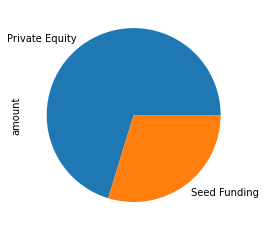

In [102]:
# Getting invested in which stage
df[df["investors"].str.contains("Anupam Mittal")].groupby("round")["amount"].sum().sort_values(ascending=False).plot(kind="pie")

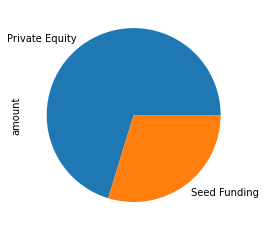

In [114]:
round_df = df[df["investors"].str.contains("Anupam Mittal")].groupby("round")["amount"].sum().sort_values(ascending=False).plot(kind="pie")

<AxesSubplot:ylabel='amount'>

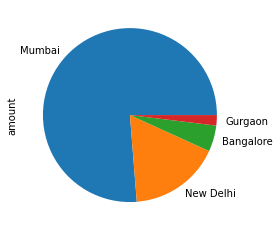

In [122]:
# Getting invested in which city
df[df["investors"].str.contains("Anupam Mittal")].groupby("city")["amount"].sum().sort_values(ascending=False).plot(kind="pie")

In [85]:
# Year on Year(YoY) investment graph
df["year"] = df["date"].dt.year

In [86]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020


<AxesSubplot:xlabel='year'>

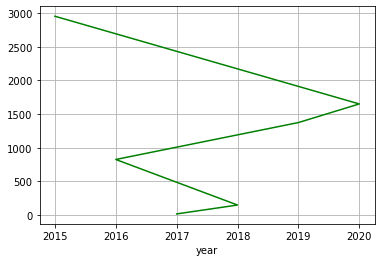

In [138]:
df[df["investors"].str.contains("Tiger Global Management")].groupby("year")["amount"].sum().sort_values(ascending=False).plot(grid=True, color="green")

In [139]:
# Getting similar Investors


### Overall Analysis

In [150]:
# find the total amount invested
round(df["amount"].sum())

296440

In [159]:
# find the maximum amount invested
df.groupby("startup")["amount"].max().sort_values(ascending=False)[0] 

32175.0

In [162]:
# Find the average amount invested
round(df.groupby("startup")["amount"].sum().mean())

129

In [163]:
# total funded startups
df["startup"].nunique()

2298

In [167]:
# Month on Month(MoM) chart
df["month"] = df["date"].dt.month

In [169]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020,9
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020,1
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020,9
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020,2
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020,2


In [171]:
# total number of fundings in each month of each year
df.groupby(["year", "month"])["startup"].count().reset_index()

,year,month,startup
0,2015,1,35
1,2015,2,14
2,2015,3,36
3,2015,4,65
4,2015,5,53
...,...,...,...
58,2019,12,10
59,2020,1,2
60,2020,2,2
61,2020,9,2


In [173]:
# total amount funded each month of each year
df.groupby(["year", "month"])["amount"].sum().reset_index()

,year,month,amount
0,2015,1,5274.637500
1,2015,2,1567.178250
2,2015,3,1910.658750
3,2015,4,4511.058750
4,2015,5,1401.427500
...,...,...,...
58,2019,12,3667.125000
59,2020,1,140.649250
60,2020,2,39.600000
61,2020,9,1801.460595


### Startup Analysis

In [35]:
df = pd.read_csv("startup_cleaned1.csv")
# df.set_index("Sr No", inplace=True)
df.sample(10)

,date,startup,vertical,subvertical,city,investors,round,amount
1317,2016-01-09,Lucideus,Technology,IT Risk Assessment and Digital Security Servic...,New Delhi,Amit Choudhary,Seed Funding,0.0000
1365,2016-09-22,DailyRounds,Consumer Internet,Mobile App for Doctors,Bangalore,"Accel Partners, Beenext, Powerhouse Ventures, ...",Private Equity,0.0000
596,2017-09-25,Tinmen,Consumer Internet,Food Delivery platform,Hyderabad,Zomato Media Pvt. Ltd,Private Equity,0.0000
2202,2015-11-16,Absentia,Virtual Reality Headset creator,NaN,Bangalore,"Astarc Ventures, 50K Ventures & others",Seed Funding,1.4850
2591,2015-07-23,JetSetGo,Private Jet/ Helicopter Marketplace,NaN,New Delhi,YourWeCan Ventures,Seed Funding,0.0000
1887,2016-05-02,Smartcooky,ECommerce,Marketplace for Health Foods,New Delhi,"Vandana Luthra,",Private Equity,0.0000
202,2018-07-25,iqlect,Technology,Data Analytics Firm,Bengaluru,Ventureast and Exfinity,Seed/ Angel Funding,20.6250
1844,2016-03-17,HealthEnablr,Consumer Internet,Doctor Discovery and booking platform,Mumbai,Undisclosed investors,Seed Funding,6.6000
408,2017-05-12,Tata Housing,Real Estate,Residential Project,Mumbai,Hines,Private Equity,189.7500
1841,2016-03-16,Wealthy,Consumer Internet,Online Investment management portal,Bangalore,"Zishaan Hayath, Abhishek Goyal, Arjun and Roha...",Seed Funding,2.0625


In [41]:
# getting the investors for a particular startup
df[df["startup"].str.contains("Lenskart")].head()[["date", "vertical", "city", "round", "amount"]]

,date,vertical,city,round,amount
15,2019-12-20,E-Commerce,Faridabad,Series G,1905.75
281,2018-04-19,Consumer Internet,Faridabad,Private Equity,0.00
1323,2016-06-09,eCommerce,New Delhi,Private Equity,0.00
1645,2016-04-05,eCommerce,New Delhi,Private Equity,495.00


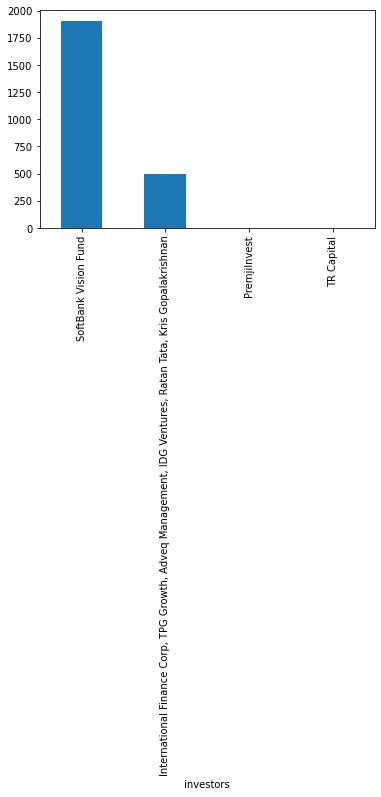

In [61]:
# getting biggest investors
df[df["startup"].str.contains("Lenskart")].groupby("investors")["amount"].sum().sort_values(ascending=False).plot(kind="bar");

In [79]:
# getting invested in which round
df[df["startup"].str.contains("Monsoon Fintech")].groupby("round")["amount"].sum().sort_values(ascending=False).any() #.plot(kind="pie");

False

In [75]:
# getting invested in which city
df[df["startup"].str.contains("Lenskart")].groupby("city")["amount"].sum().sort_values(ascending=False)

city
Faridabad    1905.75
New Delhi     495.00
Name: amount, dtype: float64

In [89]:
# year on year investment in startup
df[df["startup"].str.contains("Lenskart")].groupby("year")["amount"].sum() #.plot(grid=True, color="green")

year
2016     495.00
2018       0.00
2019    1905.75
Name: amount, dtype: float64

<AxesSubplot:xlabel='year'>

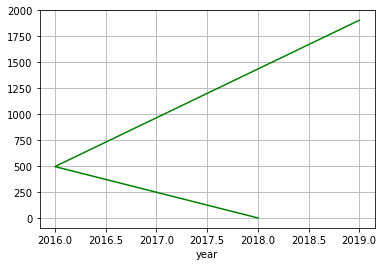

In [90]:
# Year on Year Investment Graph
df[df["startup"].str.contains("Lenskart")].groupby("year")["amount"].sum().sort_values(ascending=False).plot(grid=True, color="green")